In [ ]:
# downloads
!pip install -U tensorflow-text

In [2]:
# imports
import pandas as pd
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text
from tensorflow.keras import Model, layers, optimizers, losses, metrics, callbacks, utils
utils.set_random_seed(42)
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [3]:
# loading data; already cleaned
df = pd.read_csv('https://raw.githubusercontent.com/Rohit-Rannavre/Data-Science-2023/main/Beginner%20Data%20Science%20Projects/imdb_dataset.csv')
df.head()

,text,label
0,i always wrote this series off as being a comp...,0
1,st watched out of dir steve purcell typical ma...,0
2,this movie was so poorly written and directed ...,0
3,the most interesting thing about miryang secre...,1
4,when i first read about berlin am meer i didn ...,0


In [4]:
# getting info of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5000 non-null   object
 1   label   5000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 78.2+ KB


In [5]:
# creating X & y
X = df['text']
y = df['label']

In [6]:
# spitting data into training, testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=18)

In [7]:
# getting shape of training, testing sets
print('Shape of X_train:', X_train.shape)
print('Shape of X_test:', X_test.shape)
print('Shape of y_train:', y_train.shape)
print('Shape of y_test:', y_test.shape)

Shape of X_train: (4000,)
Shape of X_test: (1000,)
Shape of y_train: (4000,)
Shape of y_test: (1000,)


In [8]:
# model building
inputs = layers.Input(shape=(), dtype=tf.string, name='input_layer')
preprocesser = hub.KerasLayer(handle='https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3', name='preprocessor')
encoder_inputs = preprocesser(inputs)
encoder = hub.KerasLayer(handle='https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4', name='encoder')
encoder_outputs = encoder(encoder_inputs)
hidden_1 = layers.Dense(units=32, name='hidden_1')(encoder_outputs['pooled_output'])
dropout = layers.Dropout(rate=0.2)(hidden_1)
hidden_2 = layers.Dense(units=16, name='hidden_2')(dropout)
outputs = layers.Dense(units=1, activation='sigmoid', name='output_layer')(hidden_2)
model = Model(inputs=inputs, outputs=outputs)

In [9]:
# model summary
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_layer (InputLayer)       [(None,)]            0           []                               
                                                                                                  
 preprocessor (KerasLayer)      {'input_type_ids':   0           ['input_layer[0][0]']            
                                (None, 128),                                                      
                                 'input_mask': (Non                                               
                                e, 128),                                                          
                                 'input_word_ids':                                                
                                (None, 128)}                                                  

In [10]:
# model config
model.compile(optimizer=optimizers.AdamW(), loss=losses.BinaryCrossentropy(), metrics=[metrics.BinaryAccuracy()])

In [11]:
# model training
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=4, 
                    callbacks=callbacks.EarlyStopping(monitor='val_binary_accuracy', mode='max', patience=2))

Epoch 1/4
125/125 [==============================] - 70s 429ms/step - loss: 0.6604 - binary_accuracy: 0.6075 - val_loss: 0.5954 - val_binary_accuracy: 0.6880
Epoch 2/4
125/125 [==============================] - 64s 512ms/step - loss: 0.5926 - binary_accuracy: 0.6840 - val_loss: 0.5602 - val_binary_accuracy: 0.7230
Epoch 3/4
125/125 [==============================] - 64s 513ms/step - loss: 0.5797 - binary_accuracy: 0.6955 - val_loss: 0.5411 - val_binary_accuracy: 0.7400
Epoch 4/4
125/125 [==============================] - 54s 436ms/step - loss: 0.5312 - binary_accuracy: 0.7270 - val_loss: 0.5176 - val_binary_accuracy: 0.7550


In [12]:
# model evaluation
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print('Accuracy:', round(accuracy * 100, 2))

Accuracy: 75.5


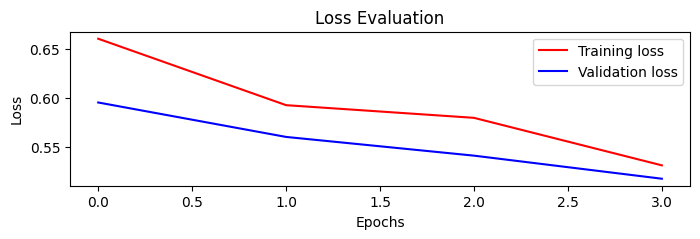

In [13]:
# plotting loss
fig = plt.figure(figsize=(8, 2))
plt.plot(history.history['loss'], 'r', label='Training loss')
plt.plot(history.history['val_loss'], 'b', label='Validation loss')
plt.title('Loss Evaluation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend();

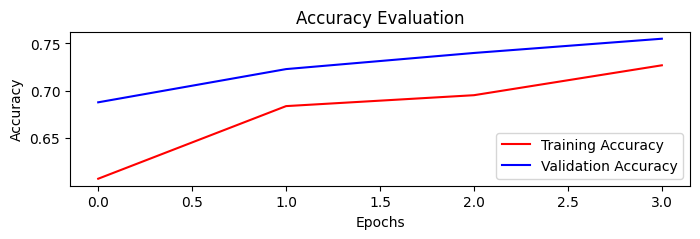

In [14]:
# plotting accuracy
fig = plt.figure(figsize=(8, 2))
plt.plot(history.history['binary_accuracy'], 'r', label='Training Accuracy')
plt.plot(history.history['val_binary_accuracy'], 'b', label='Validation Accuracy')
plt.title('Accuracy Evaluation')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend();